<a href="https://colab.research.google.com/github/yuwotmate/EDA-on-Singapore-Transport-System/blob/main/PDAS_CA2_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on Singapore Transport System**

Author- Kaleb Nim

Completed on 14/2/2022

In [ ]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm
import matplotlib
import matplotlib.font_manager
matplotlib.rcParams['mathtext.fontset'] = 'custom' # set LaTeX fonts
matplotlib.rcParams['mathtext.bf'] = 'Lato:bold'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Things to do, 
Find and merge dataset for Objective 1: Is Singapore's Public Transport addordable. 

Currently only have one dataset, might wat to look into bus related fares and do a comparism there, ( then maye can change objective )

Find a dataset with many outliers and maybe can do a mini analysis on those specific outliers ( like how are they distributed, where do these outliers orginate from , is it from mostly one column? no narrow thinking ) 

EDA on the Datasets itself once all datasets found.

From EDA we can look towards using one Statsmodel and at least one plotly graph for DAVI ( can look into datacamp project )

3 Follow up questions for each objective, 
Find Dataset --> EDA + Data manupliate --> Plot graphs --> Get insights --> conclusion 

Powerpoint For PDAS
Powerpoint For DAVI 

I think its better to write down insights as i go to save time?

For Objective 2:


## Dataset 1: transport_node_train_202201



### Load dataset

In [ ]:
train_volume_dup = pd.read_csv('/content/transport_node_train_202201.csv')
train_volume_dup.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2022-01,WEEKDAY,11,TRAIN,NS7,2359,1786
1,2022-01,WEEKENDS/HOLIDAY,11,TRAIN,NS7,1806,1401
2,2022-01,WEEKDAY,16,TRAIN,SW4,878,1232
3,2022-01,WEEKENDS/HOLIDAY,16,TRAIN,SW4,638,556
4,2022-01,WEEKDAY,10,TRAIN,CC5,1184,3346


### Check for null values

In [ ]:
train_volume_dup.isna().sum()

YEAR_MONTH              0
DAY_TYPE                0
TIME_PER_HOUR           0
PT_TYPE                 0
PT_CODE                 0
TOTAL_TAP_IN_VOLUME     0
TOTAL_TAP_OUT_VOLUME    0
dtype: int64

### Check for duplicates

In [ ]:
print(f"Shape before removal of dups: {train_volume_dup.shape}")
train_volume = train_volume_dup.drop_duplicates()
print(f"Shape after removal of dups: {train_volume.shape}")

Shape before removal of dups: (6535, 7)
Shape after removal of dups: (6535, 7)


### New column: Total Commuters
- For further data analysis, we will create one new column: ```Total Commuters```
- They are defined as follows:
  No. of people that tap in at a MRT station + No. people that tap out at a MRT station

This will be used to tell how many people is at that particular station at a specific hour

In [ ]:
train_volume['Total Commuters MRT'] = train_volume['TOTAL_TAP_IN_VOLUME'] + train_volume['TOTAL_TAP_OUT_VOLUME']

### Rename Columns features for easier understanding

In [ ]:
train_volume.rename(columns = {
    "YEAR_MONTH" : "Year-Month",
    "DAY_TYPE" : "Day Type",
    "TIME_PER_HOUR" : "Time of Day",
    "PT_TYPE" : "Transport Type",
    "PT_CODE" : "MRT STATION",
    "TOTAL_TAP_IN_VOLUME" : "Hourly Tap In Volume",
    "TOTAL_TAP_OUT_VOLUME" : "Hourly Tap Out Volume"
}, inplace = True)
train_volume.head()

,Year-Month,Day Type,Time of Day,Transport Type,MRT STATION,Hourly Tap In Volume,Hourly Tap Out Volume,Total Commuters MRT
0,2022-01,WEEKDAY,11,TRAIN,NS7,2359,1786,4145
1,2022-01,WEEKENDS/HOLIDAY,11,TRAIN,NS7,1806,1401,3207
2,2022-01,WEEKDAY,16,TRAIN,SW4,878,1232,2110
3,2022-01,WEEKENDS/HOLIDAY,16,TRAIN,SW4,638,556,1194
4,2022-01,WEEKDAY,10,TRAIN,CC5,1184,3346,4530


### Descriptive Analysis

In [ ]:
train_volume.describe()

,Time of Day,Hourly Tap In Volume,Hourly Tap Out Volume,Total Commuters MRT
count,6535.000000,6535.000000,6535.000000,6535.000000
mean,13.351951,7466.342464,7440.056771,14906.399235
std,6.104093,11540.937175,11563.268554,21461.875552
min,0.000000,0.000000,0.000000,1.000000
25%,9.000000,1042.000000,1055.500000,2330.000000
50%,14.000000,2947.000000,2936.000000,6390.000000
75%,19.000000,8926.500000,8558.000000,18187.000000
max,23.000000,142063.000000,121717.000000,246169.000000


In [ ]:
train_volume.pivot_table(values = ["Hourly Tap In Volume","Hourly Tap Out Volume"],index= "Day Type", aggfunc= [min, max, np.mean, np.median, np.std]) 

min  ...                   std
                 Hourly Tap In Volume  ... Hourly Tap Out Volume
Day Type                               ...                      
WEEKDAY                             0  ...          14548.901071
WEEKENDS/HOLIDAY                    0  ...           5889.089098

[2 rows x 10 columns]

From the Table we can see that Weekdays have Higher Median tap in tap out volumes then Weekends/holiday

### Check + Correct Datatypes

In [ ]:
train_volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6535 entries, 0 to 6534
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year-Month             6535 non-null   object
 1   Day Type               6535 non-null   object
 2   Time of Day            6535 non-null   int64 
 3   Transport Type         6535 non-null   object
 4   MRT STATION            6535 non-null   object
 5   Hourly Tap In Volume   6535 non-null   int64 
 6   Hourly Tap Out Volume  6535 non-null   int64 
 7   Total Commuters MRT    6535 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 459.5+ KB


It looks like the column ```Year-Month``` is an ```object``` dtype where it should be ```datetime```

Lets fix that

In [ ]:
train_volume["Year-Month"] = pd.to_datetime(train_volume["Year-Month"])
train_volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6535 entries, 0 to 6534
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year-Month             6535 non-null   datetime64[ns]
 1   Day Type               6535 non-null   object        
 2   Time of Day            6535 non-null   int64         
 3   Transport Type         6535 non-null   object        
 4   MRT STATION            6535 non-null   object        
 5   Hourly Tap In Volume   6535 non-null   int64         
 6   Hourly Tap Out Volume  6535 non-null   int64         
 7   Total Commuters MRT    6535 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 459.5+ KB


### Check for Outliers

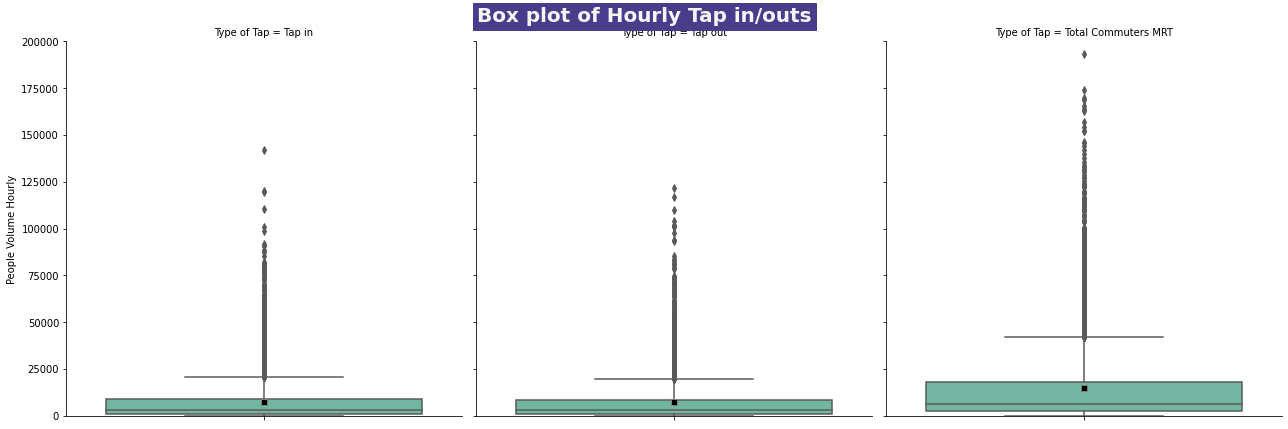

In [ ]:
# Data Processing
train_volume_melt= train_volume.melt(id_vars=['Year-Month','Day Type','MRT STATION','Time of Day'],value_vars=['Hourly Tap In Volume','Hourly Tap Out Volume','Total Commuters MRT'] ,var_name='Type of Tap',value_name='People Volume Hourly')
train_volume_melt['Type of Tap'].replace({"Hourly Tap In Volume": "Tap in", "Hourly Tap Out Volume": "Tap out"}, inplace=True)
train_volume_melt


# Plotting of graphs
g = sns.catplot(y = "People Volume Hourly", col = "Type of Tap", data = train_volume_melt, kind="box", palette='Set2', height = 6,hue='Type of Tap', showmeans = True, meanprops = {
    "marker" : "s",
    "markeredgecolor" : "gray",
    "markerfacecolor" : "black"
}) # produce a boxplot, with mean also shown

g.fig.suptitle("Box plot of Hourly Tap in/outs", weight = "semibold" ,size=20, backgroundcolor= 'darkslateblue' ,color='whitesmoke')
g.fig.subplots_adjust(top = 0.88) # adjust position of title to not overlap with graph

# plot.fig.supxlabel(weight = "semibold" ,size=17, backgroundcolor= 'darkslateblue' ,color='whitesmoke')
g.set(ylim=(0, 200000)) # Set y-limit to 200,000
# print(type(plot))
g.fig.subplots_adjust(top = 0.9) # adjust position of title to not overlap with graph
# plot.ax.get_yaxis().get_major_formatter().set_scientific(False) # remove scientific notation for easier reading
plt.show()





All three box plots shows a positively skewed distribution and there is many outlier values outside the wiskers range of 1.5*IQR

### Infomation about Outliers

Outliers increase the variability in your data, which decreases statistical power.

#### Outilers in Hourly **Tap In** Volume

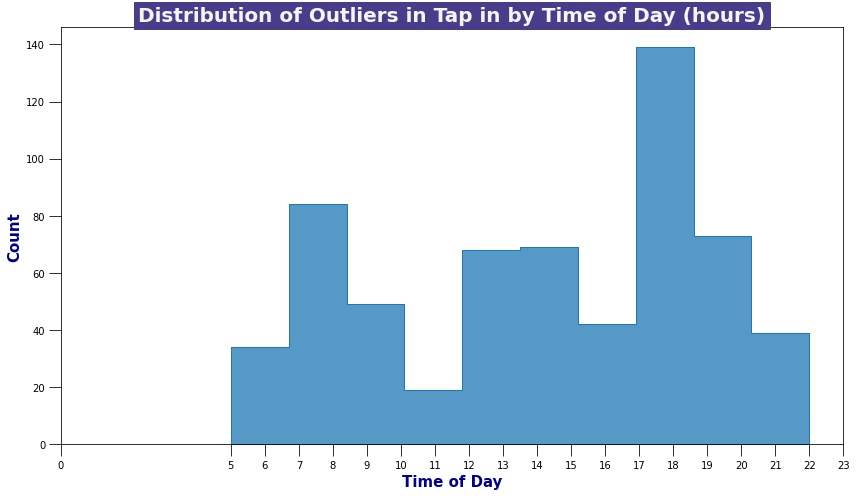

In [ ]:
#Data Processing: Get Outlier values of specific column
Q3 = train_volume["Hourly Tap In Volume"].quantile(0.75)
Q1 = train_volume["Hourly Tap In Volume"].quantile(0.25)
IQR = Q3 - Q1
UpperFence = Q3 + 1.5 * IQR
LowerFence = Q1 - 1.5 * IQR
mask = (train_volume["Hourly Tap In Volume"] > UpperFence) | (train_volume["Hourly Tap In Volume"] < LowerFence)
outlier_train_volume_Tapin = train_volume[mask]

#Plot
fig, ax = plt.subplots(figsize = (12, 7), tight_layout = True)
sns.histplot(outlier_train_volume_Tapin, x="Time of Day", element="step",bins=10)

#Customizations
ax.set_title("Distribution of Outliers in Tap in by Time of Day (hours)", loc = "center",color='whitesmoke',weight='bold',size=20, backgroundcolor= 'darkslateblue')
ax.set_ylabel("Count",color='darkblue',weight='bold',size=15)
ax.set_xlabel("Time of Day",color='darkblue',weight='bold',size=15)
ax.set_xticks(train_volume['Time of Day'].unique())

# ax.set_xticks()
ax.tick_params(axis='both', colors='black',size=12)


#### Outilers in Hourly **Tap out** Volume

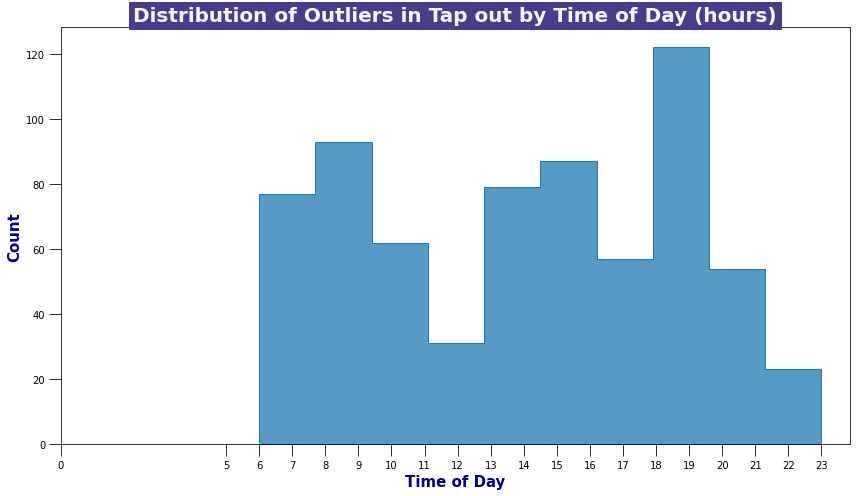

In [ ]:
#Data Processing: Get Outlier values of specific column
Q3 = train_volume["Hourly Tap Out Volume"].quantile(0.75)
Q1 = train_volume["Hourly Tap Out Volume"].quantile(0.25)
IQR = Q3 - Q1
UpperFence = Q3 + 1.5 * IQR
LowerFence = Q1 - 1.5 * IQR
mask = (train_volume["Hourly Tap Out Volume"] > UpperFence) | (train_volume["Hourly Tap Out Volume"] < LowerFence)
outlier_train_volume_Tapin = train_volume[mask]

#Plot
fig, ax = plt.subplots(figsize = (12, 7), tight_layout = True)
sns.histplot(outlier_train_volume_Tapin, x="Time of Day", element="step",bins=10)

#Customizations
ax.set_title("Distribution of Outliers in Tap out by Time of Day (hours)", loc = "center",color='whitesmoke',weight='bold',size=20, backgroundcolor= 'darkslateblue')
ax.set_ylabel("Count",color='darkblue',weight='bold',size=15)
ax.set_xlabel("Time of Day",color='darkblue',weight='bold',size=15)
ax.set_xticks(train_volume['Time of Day'].unique())

# ax.set_xticks()
ax.tick_params(axis='both', colors='black',size=12)

#### Outilers in Hourly **Total commuter** Volume

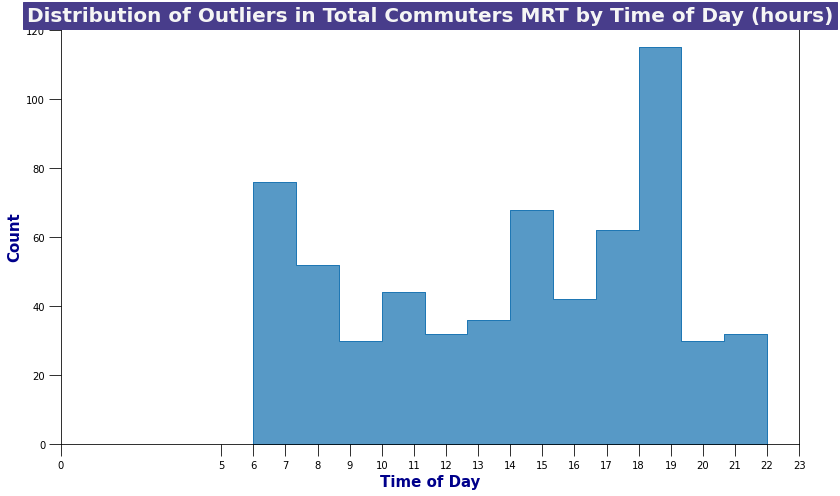

In [ ]:
#Data Processing: Get Outlier values of specific column
Q3 = train_volume["Total Commuters MRT"].quantile(0.75)
Q1 = train_volume["Total Commuters MRT"].quantile(0.25)
IQR = Q3 - Q1
UpperFence = Q3 + 1.5 * IQR
LowerFence = Q1 - 1.5 * IQR
mask = (train_volume["Total Commuters MRT"] > UpperFence) | (train_volume["Total Commuters MRT"] < LowerFence)
outlier_train_volume_total_commuters = train_volume[mask]

#Plot
fig, ax = plt.subplots(figsize = (12, 7), tight_layout = True)
sns.histplot(outlier_train_volume_total_commuters, x="Time of Day", element="step",bins=12)

#Customizations
ax.set_title("Distribution of Outliers in Total Commuters MRT by Time of Day (hours)", loc = "center",color='whitesmoke',weight='bold',size=20, backgroundcolor= 'darkslateblue')
ax.set_ylabel("Count",color='darkblue',weight='bold',size=15)
ax.set_xlabel("Time of Day",color='darkblue',weight='bold',size=15)
ax.set_xticks(train_volume['Time of Day'].unique())

# ax.set_xticks()
ax.tick_params(axis='both', colors='black',size=12)

### So which stations has the most outliers? 

ill be only using Total People for this comparism

Text(0, 0.5, 'count')

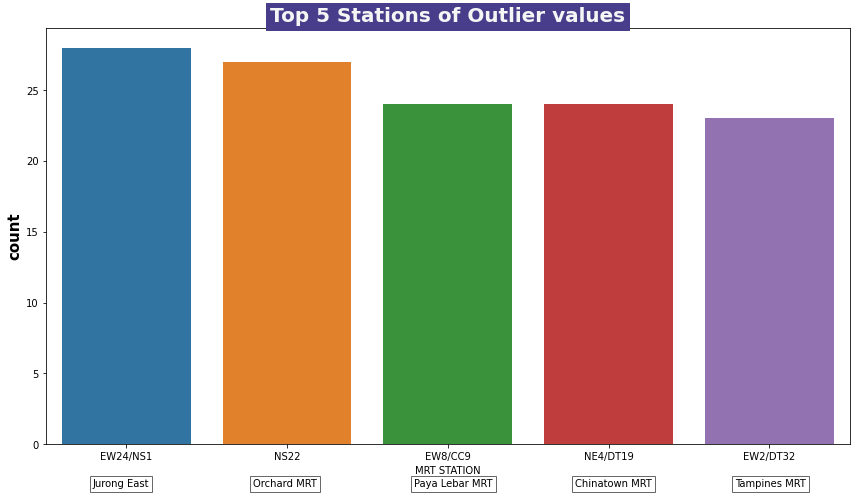

In [ ]:
# Data processing
train_vol_bystations_outliers = outlier_train_volume_total_commuters.groupby('MRT STATION').size().nlargest(5)
# ['Total Commuters MRT'].sort_values(by=['Total Commuters MRT'], ascending = False)

train_vol_bystations_outliers.rename({"EW24/NS1":"Jurong East"})
# 'CC,NS,SW,NE,EW'

#ploting
fig, ax = plt.subplots(figsize = (12, 7), tight_layout = True)
sns.barplot(x=train_vol_bystations_outliers.index , y=train_vol_bystations_outliers.values)
ax.set_title("Top 5 Stations of Outlier values", loc = "center",color='whitesmoke',weight='bold',size=20, backgroundcolor= 'darkslateblue')
# ax.set_xticklabels(["Jurong East","Orchard MRT",'Paya Lebar MRT',"Chinatown MRT","Tampines MRT"])

#Annotations
bbox = {
    "boxstyle" : "square,pad=0.3",
    "fc" : "white",
    "ec" : "dimgrey"
}
mrt_stations_top_5 = ["Jurong East","Orchard MRT",'Paya Lebar MRT',"Chinatown MRT","Tampines MRT"]
for x,y in zip([0,1,2,3,4],mrt_stations_top_5):
  ax.text(s = f"{y}", x= x-0.21, y = -3, color = "black", bbox = bbox)

ax.set_ylabel("count",color='black',weight='bold',size=15)

We can see that 4/5 of the top 5 Mrt stations that has outliers are Interchanges , and the only other station that's not a interchange is Orchard MRT which is located in the Heart of the CBD

### Handling Outliers

In [ ]:
data = train_volume[['Total Commuters MRT','Hourly Tap Out Volume','Hourly Tap In Volume']]
Q3 = data.quantile(0.75)
Q1 = data.quantile(0.25)
IQR = Q3 - Q1
print("Shape Before Removing Outliers:", data.shape)
data = data[~((data < (Q1 - (1.5 * IQR))) | (data > (Q3 + (1.5 * IQR)))).any(axis=1)]
print("Shape After Removing Outliers:", data.shape)

Shape Before Removing Outliers: (6535, 3)
Shape After Removing Outliers: (5639, 3)


### Lets plot the box plot of the total commuters again

NameError: ignored

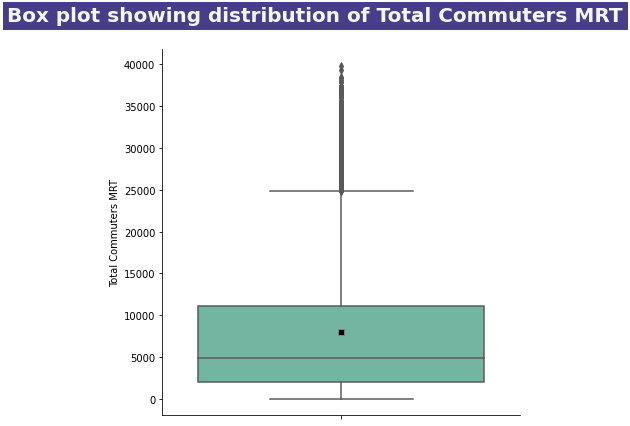

In [ ]:
# train_volume_melt= train_volume.melt(id_vars=['Year-Month','Day Type','MRT STATION','Time of Day'],value_vars=['Hourly Tap In Volume','Hourly Tap Out Volume','Total Commuters'] ,var_name='Type of Tap',value_name='People Volume Hourly')
# train_volume_melt['Type of Tap'].replace({"Hourly Tap In Volume": "Tap in", "Hourly Tap Out Volume": "Tap out"}, inplace=True)
# train_volume_melt


# Plotting of graphs
g = sns.catplot(y = "Total Commuters MRT", data = data, kind="box", palette='Set2', height = 6, showmeans = True, meanprops = {
    "marker" : "s",
    "markeredgecolor" : "gray",
    "markerfacecolor" : "black"
}) # produce a boxplot, with mean also shown

g.fig.suptitle("Box plot showing distribution of Total Commuters MRT", weight = "semibold" ,size=20, backgroundcolor= 'darkslateblue' ,color='whitesmoke')
g.fig.subplots_adjust(top = 0.88) # adjust position of title to not overlap with graph

# plot.fig.supxlabel(weight = "semibold" ,size=17, backgroundcolor= 'darkslateblue' ,color='whitesmoke')
# g.set(ylim=(0, 200000)) # Set y-limit to 200,000
print(type(plot))
plot.fig.subplots_adjust(top = 0.9) # adjust position of title to not overlap with graph
# plot.ax.get_yaxis().get_major_formatter().set_scientific(False) # remove scientific notation for easier reading
plt.show()
# data.head()


Even though, removing outliers has reudecd the variance of the data, we will not be removing them as these outliers gives insights into the peak hours of MRT travel.

**Add one insights to dataset RMB TO DO THIS**

# **Dataset 2: transport_node_bus_202201**

---



## Load Dataset

In [ ]:
bus_volume_dup = pd.read_csv('/content/transport_node_bus_202201.csv')
bus_volume_dup.head()

## Check for null values




In [ ]:
bus_volume_dup.isna().sum()

## Check for duplicates

In [ ]:
print(f"Shape before removal of dups: {bus_volume_dup.shape}")
bus_volume = bus_volume_dup.drop_duplicates()
print(f"Shape after removal of dups: {bus_volume.shape}")

Since the shape is the same. We can conclude that there is no duplicate values in dataset

## New column: Total Commuters
- For further data analysis, we will create one new column: ```Total Commuters Bus```
- They are defined as follows:
  No. of people that tap in at a MRT station + No. people that tap out at a MRT station

This will be used to tell how many people is at that particular station at a specific hour

In [ ]:
bus_volume['Total Commuters Bus'] = bus_volume['TOTAL_TAP_IN_VOLUME'] + bus_volume['TOTAL_TAP_OUT_VOLUME']

## **Rename** Columns features for easier understanding

In [ ]:
bus_volume.rename(columns = {
    "YEAR_MONTH" : "Year-Month",
    "DAY_TYPE" : "Day Type",
    "TIME_PER_HOUR" : "Time of Day",
    "PT_TYPE" : "Transport Type",
    "PT_CODE" : "Bus Stop Code",
    "TOTAL_TAP_IN_VOLUME" : "Hourly Tap In Volume",
    "TOTAL_TAP_OUT_VOLUME" : "Hourly Tap Out Volume"
}, inplace = True)
bus_volume.head()

We can see that the new column ```Total Commuters Bus``` Has been successfully created 

The Columns are also renamed to a format more understandable to end users

E.g ```TOTAL_TAP_IN_VOLUME``` --> ```Hourly Tap In Volume```

## Descriptive Analysis

In [ ]:
bus_volume.describe()

In [ ]:
bus_volume.pivot_table(values = ["Hourly Tap In Volume","Hourly Tap Out Volume"],index= "Day Type", aggfunc= [min, max, np.mean, np.median, np.std]) 

## Check + Correct Datatypes

In [ ]:
bus_volume.info()

In [ ]:
bus_volume["Year-Month"] = pd.to_datetime(train_volume["Year-Month"])
bus_volume.info()

## Check for Outliers

In [ ]:
# Data Processing
bus_volume_melt= bus_volume.melt(id_vars=['Year-Month','Day Type','Bus Stop Code','Time of Day'],value_vars=['Hourly Tap In Volume','Hourly Tap Out Volume','Total Commuters Bus'] ,var_name='Type of Tap',value_name='People Volume Hourly')
bus_volume_melt['Type of Tap'].replace({"Hourly Tap In Volume": "Tap in", "Hourly Tap Out Volume": "Tap out"}, inplace=True)
bus_volume_melt


# Plotting of graphs
g = sns.catplot(x = "People Volume Hourly", col = "Type of Tap", data = bus_volume_melt, kind="box", palette='Set2', height = 6,hue='Type of Tap', showmeans = True, meanprops = {
    "marker" : "s",
    "markeredgecolor" : "gray",
    "markerfacecolor" : "black"
}) # produce a boxplot, with mean also shown

g.fig.suptitle("Box plot of Hourly Tap in/outs", weight = "semibold" ,size=20, backgroundcolor= 'darkslateblue' ,color='whitesmoke')
g.fig.subplots_adjust(top = 0.88) # adjust position of title to not overlap with graph

# plot.fig.supxlabel(weight = "semibold" ,size=17, backgroundcolor= 'darkslateblue' ,color='whitesmoke')
# g.set(ylim=(0, 20000)) # Set y-limit to 200,000
print(type(plot))
plot.fig.subplots_adjust(top = 0.9) # adjust position of title to not overlap with graph
# plot.ax.get_yaxis().get_major_formatter().set_scientific(False) # remove scientific notation for easier reading
plt.show()

## Merge Bus commuter volumes and MRT commuter volumes into one dataset

This Dataset will be used in the Final analysis for DAVI

In [ ]:
bus_volume.rename(columns= {
    "Total Commuters Bus" : "Total Commuters",
    "Bus Stop Code" : "Station-Bus_stop_Location",
}, inplace= True)

train_volume.rename(columns= {
    "Total Commuters MRT" : "Total Commuters",
    "MRT STATION" : "Station-Bus_stop_Location",
}, inplace= True)
# This is to ensure that the columns merge into one column together when concatinate

bus_mrt_volume = pd.concat([bus_volume, train_volume], ignore_index= True)

bus_mrt_volume

In [ ]:
print((bus_mrt_volume['Hourly Tap In Volume'] - bus_mrt_volume['Hourly Tap Out Volume']).sum())

In [ ]:
# Export + download final dataset
from google.colab import files
bus_mrt_volume.to_csv('bus_mrt_volume.csv') 
files.download('bus_mrt_volume.csv')

Have the overall ridership gone up in recent years?

In [ ]:
# Data processing
ridership['Mean Daily Ridership in millions'] = ridership['Mean Daily Ridership'] / 1000000 # Create new col that represents ridership in millions for easier understanding

ridership_all_types = ridership.groupby('Year').sum() # Get all ridership across the 4 Public transport, 

#Plot Graph
fig, ax = plt.subplots(figsize=(14,9))
sns.barplot(data=ridership_all_types.loc['2000':'2016'],x=ridership_all_types.loc['2000':'2016'].index,y="Mean Daily Ridership in millions" ,ax = ax , palette ="ch:s=-.2,r=.6") # Only used years 2000 and above

# Customize
ax.set_title("Distribution of Daily Ridership by Mode of Transport", weight = "semibold" ,size=20, backgroundcolor= 'darkslateblue' ,color='whitesmoke')
ax.text(10, -.505, "*Includes all Transport types together (MRT,BUS,LRT,TAXI)  ", weight="light", fontsize = 10)

sns.despine(left = True)


# Dataset Fares for MRT and LRT:

### Load Data:

In [ ]:
mrt_prices = pd.read_csv('/content/fares-for-mrt-and-lrt-effective-from-26-december-2021.csv')
mrt_prices.head()

### New column: Distance_start
- For further data analysis, we will create one new columns: ```Distance_Start```
- They are defined as follows:
  First value of distance column

In [ ]:
# mrt_prices['Distance_Start'] = mrt_prices['distance'].agg(re.search('\d+', 'aa33bbb44'))

# for i in mrt_prices.index:
#     print(str(mrt_prices.at[i, 'distance'][::1]))
#     mrt_prices.at[i, 'Distance_Startssss'] = re.search(r"[\d\.\d]", str(mrt_prices.at[i, 'distance'][::1])).start()
# mrt_prices.head()

mrt_prices['distance_start'] = mrt_prices['distance'].str.extract(r'(\d+.\d+)').astype('float')
mrt_prices.head()

# mrt_prices['Distance_Startsss'].value_counts()

In [ ]:
mrt_prices.info()

### Check for duplicates ( come back to this maybe )

In [ ]:
# mrt_prices.duplicated(subset='fare_per_ride', keep='first').sum()
print(f"Shape before removal of dups: {mrt_prices.shape}")
mrt_prices = mrt_prices.drop_duplicates()
print(f"Shape after removal of dups: {mrt_prices.shape}")

### Renaming Features

It seems like the desciptions for the fare type is abit to lengthy, lets shorten it. 

Changed value names:

*   ```Adult card fare``` --> ```Adult```
*   ```Senior citizen card fare``` --> ```Senior_Citizen```
*   ```Student card fare``` --> ```Student```
*   ```Workfare transport concession card fare``` --> ```Workfare_Concession```
*   ```Persons with diabilities card fare``` --> ```Persons_with_diabilities```



In [ ]:
mrt_prices['fare_type'].replace({"Adult card fare": "Adult", "Senior citizen card fare": "Senior","Student card fare": "Student", "Workfare transport concession card fare": "Workfare Concession","Persons with diabilities card fare": "Diabilities"}, inplace=True)
mrt_prices['fare_type'].unique()

### Descriptive Analysis

In [ ]:
mrt_prices.describe()

In [ ]:
mrt_prices.pivot_table(values = "fare_per_ride",index= "fare_type", aggfunc= [min, max, np.mean, np.median, np.std]) 

### Check missing Values:
No Missing Values in this dataset

In [ ]:
mrt_prices.isna().sum()

### **Check for Outliers**

In [ ]:
g =    sns.boxplot(y = 'fare_per_ride',data =mrt_prices , orient= "h")
sns.despine(left = True)
plt.title(f"Box Plot of Fare Per Ride", fontdict = {
        "weight" : "semibold" })
plt.show()

From the data, we can see that there is no overall outlier values, however is that the case for all fare types?

Since ```Fare type``` --> ```Single trip``` is not affected by Before 7.45 discount , we shall plot it seperately from the other ```Fare Types```.



In [ ]:
# Data Preprocessing
mrt_prices_all_other_fare_types = mrt_prices[mrt_prices['fare_type'].isin(['Adult', 'Senior', 'Student','Workfare Concession', 'Persons_with_diabilities'])]

# fig, ax = plt.subplots(figsize = (9, 5), tight_layout = True)
sns.set_style("darkgrid", {"axes.facecolor": ".7"})

g = sns.catplot(data=mrt_prices_all_other_fare_types,x="fare_type",y='fare_per_ride',kind='box',col="applicable_time")
plt.suptitle("Distribution of Fare_Per_Ride by fare type", weight = "semibold")
plt.subplots_adjust(top = 0.9) # adjust position of title to not overlap with graph
g.set_xticklabels(rotation=90, horizontalalignment='right')
# ax.set_ylabel("Fare per ride (cents)",color='darkblue',weight='bold',size=8)
g.set_ylabels("Fare per ride (cents)",color='darkblue',weight='bold',size=15)

plt.show()

In [ ]:
# Data processing
mrt_prices_single_trip = mrt_prices[mrt_prices['fare_type']=="Single trip"]
print(mrt_prices_single_trip.head())

# Plotting
g = sns.catplot(data=mrt_prices_single_trip,x="fare_type",y='fare_per_ride',kind='box')


plt.suptitle("Distribution of Fare Per Ride by Single Trip", weight = "semibold")
plt.subplots_adjust(top = 0.9) # adjust position of title to not overlap with graph
# g.set_xticklabels( horizontalalignment='right')
# ax.set_ylabel("Fare per ride (cents)",color='darkblue',weight='bold',size=8)
g.set_ylabels("Fare per ride (cents)",color='darkblue',weight='bold',size=15)

# ADD ANNOTATIONS For Outlier values
plt.show()


We See that there are two outliers, one at 150 cents and 

### How many levels of distance range are there?

In [ ]:
mrt_prices['distance'].unique()
print(f"There are {len(mrt_prices['distance'].unique())} ranges of distances.\nThey are: \n{mrt_prices['distance'].unique()}")

Lets take a quick look at how to variables correlate to each other

In [ ]:
# fig, ax2 = plt.subplots(figsize=(10,8))

sns.pairplot(data=mrt_prices,vars=["fare_per_ride",'distance_start'],hue='fare_type',diag_kws={'alpha':.5},palette='Set2')

How are the starting prices distributed by fare type?

In [ ]:
# Data processing
mrt_prices_start = mrt_prices[mrt_prices['distance_start'] == 3.2]
mrt_prices_start.head()

g= sns.catplot(kind='bar',data=mrt_prices,x="fare_type",y="fare_per_ride",col="applicable_time",ci=False)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
g.set_xticklabels(rotation=90, horizontalalignment='right')

plt.legend()
plt.show()

#### What Is the a relationship between fair price and distance travelled by mrt?

In [ ]:
#plotting of graph
sns.set_style('whitegrid')
with sns.axes_style("ticks", { "font.family" : "Lato"}):
  g = sns.lmplot(data=mrt_prices,x='distance_start',y='fare_per_ride',col="applicable_time",hue='fare_type')
  g.fig.suptitle("What is the correlation between distance travelled by mrt and fair price?", weight = "semibold")
  g.fig.subplots_adjust(top = 0.85) 
  g.set_titles(col_template ="{col_name}")
  g.legend.set_frame_on(True)

plt.show()
plt.clf()

In [ ]:
# from google.colab import files
# mrt_prices.to_csv('mrt_prices.csv') 
# files.download('mrt_prices.csv')
mrt_prices

## Dataset 3: fares-for-express-bus-services-effective-from-26-december-2021

### Load Dataset

In [ ]:
bus_prices_express= pd.read_csv('/content/fares-for-express-bus-services-effective-from-26-december-2021.csv')
bus_prices_express.head()

### Check for null values

In [ ]:
bus_prices_express.isna().sum()

### Check + drop duplicates

In [ ]:
print(f"Shape before removal of dups: {bus_prices_express.shape}")
bus_prices_express = bus_prices_express.drop_duplicates()
print(f"Shape after removal of dups: {bus_prices_express.shape}")

In [ ]:
bus_prices_express.shape

### New column: Distance Travelled
- For further data analysis, we will create one new columns: ```Distance Travelled```
- They are defined as follows:
  First value of distance column

#### How many levels of distance range are there?

In [ ]:
bus_prices_express['distance'].unique()
print(f"There are {len(bus_prices_express['distance'].unique())} ranges of distances.\nThey are: \n{bus_prices_express['distance'].unique()}")

We can see that both Buses and MRT uses the same distance range to caculate the prices of travel fares

In [ ]:
# Add new column: Distanced Travelled
bus_prices_express['Distance Travelled'] = bus_prices_express['distance'].str.extract(r'(\d+.\d+)').astype('float')
bus_prices_express.head()


### Renaming Features

It seems like the desciptions for the fare type is abit to lengthy, lets shorten it. 

Changed value names:

*   ```cash_fare_per_ride``` --> ```Cash```
*   ```adult_card_fare_per_ride``` --> ```Adult```
*   ```senior_citizen_card_fare_per_ride``` --> ```Senior```
*   ```student_card_fare_per_ride	``` --> ```Student```
*   ```workfare_transport_concession_card_fare_per_ride``` --> ```Workfare Transport```
*   ```persons_with_disabilities_card_fare_per_ride	``` --> ```Disabilities```


In [ ]:
print(bus_prices_express.head())
bus_prices_express.rename(columns= {
    "distance":"Distance",
    "cash_fare_per_ride" : "Cash",
    "adult_card_fare_per_ride" : "Adult",
    "senior_citizen_card_fare_per_ride" : "Senior",
    "student_card_fare_per_ride" : "Student",
    "persons_with_disabilities_card_fare_per_ride" : "Disabilities",
    "workfare_transport_concession_card_fare_per_ride" : "Workfare Concession"

}, inplace= True)

bus_prices_express.columns

### Descriptive Analysis

In [ ]:
bus_prices_express.describe()

In [ ]:
bus_prices_express.sort_values(by=["Distance Travelled"], inplace = True)
# print(bus_prices_express.head())
bus_prices_express_melt = bus_prices_express.melt(id_vars=["Distance"],value_vars=['Cash', 'Adult', 'Senior', 'Student', 'Workfare Concession','Disabilities'],var_name='Type of card',value_name='Price per fare (express)')

bus_prices_express_melt.pivot_table(values = "Price per fare (express)",index= "Distance", aggfunc= [min, max, np.mean, np.median, np.std]) 

In [ ]:
bus_prices_express_melt.head()

### Check for Outliers

In [ ]:
# Plotting of graphs
plot = sns.catplot(y = "Price per fare (express)", x = "Type of card", data = bus_prices_express_melt, kind="box", height = 6, showmeans = True, meanprops = {
    "marker" : "s",
    "markeredgecolor" : "gray",
    "markerfacecolor" : "black"
}) # produce a boxplot, with mean also shown
plot.fig.suptitle("Distribution of Price per fare by Type of card", weight = "semibold" ,size=20, backgroundcolor= 'darkslateblue' ,color='whitesmoke')
# plot.fig.supxlabel(weight = "semibold" ,size=17, backgroundcolor= 'darkslateblue' ,color='whitesmoke')

print(type(plot))
plot.fig.subplots_adjust(top = 0.9) # adjust position of title to not overlap with graph
plot.ax.get_yaxis().get_major_formatter().set_scientific(False) # remove scientific notation for easier reading
plt.show()

It seems like there is outlier values for Senior citizens, Student and People with disabilities, Lets take a closer look

In [ ]:
# Data processing
bus_prices_Senior_student_disa = bus_prices_express_melt[bus_prices_express_melt['Type of card'].isin(["Senior","Student","Disabilities"])]
fig, ax2 = plt.subplots(figsize=(10,8))

sns.violinplot(x="Type of card", y="Price per fare (express)",
                data=bus_prices_Senior_student_disa, ax=ax2
                )
ax2.set(title="Distribution of Price per fare by Type of card")

Since Student, Senior and Disabilities prices are capped at a specific amount after a certain distance travelled , smt smt

Vilion plot for differnent types

## Dataset 3.5: fares-for-trunk-bus-services-effective-from-26-december-2021

### Load Dataset

In [ ]:
bus_prices_trunk= pd.read_csv('/content/fares-for-trunk-bus-services-effective-from-26-december-2021.csv')
bus_prices_trunk.head()

### subset the data to only card related fares and not cash

In [ ]:
bus_prices_trunk.drop(['senior_citizen_cash_fare_per_ride','student_cash_fare_per_ride','workfare_transport_concession_cash_fare_per_ride','persons_with_disabilities_cash_fare_per_ride'], axis = 1, inplace = True) 
bus_prices_trunk.head()

### Renaming Features

It seems like the desciptions for the fare type is abit to lengthy, lets shorten it. 

Changed value names:

*   ```cash_fare_per_ride``` --> ```Cash```
*   ```adult_card_fare_per_ride``` --> ```Adult```
*   ```senior_citizen_card_fare_per_ride``` --> ```Senior```
*   ```student_card_fare_per_ride	``` --> ```Student```
*   ```workfare_transport_concession_card_fare_per_ride``` --> ```Workfare Transport```
*   ```persons_with_disabilities_card_fare_per_ride	``` --> ```Disabilities```

In [ ]:
bus_prices_trunk.rename(columns= {
    "distance":"Distance",
    "adult_cash_fare_per_ride" : "Cash",
    "adult_card_fare_per_ride" : "Adult",
    "senior_citizen_card_fare_per_ride" : "Senior",
    "student_card_fare_per_ride" : "Student",
    "persons_with_disabilities_card_fare_per_ride" : "Disabilities",
    "workfare_transport_concession_card_fare_per_ride" : "Workfare Transport"

}, inplace= True)

In [ ]:
bus_prices_trunk.shape
print(bus_prices_trunk.columns)

In [ ]:
bus_prices_trunk_melt = bus_prices_trunk.melt(id_vars=["Distance"],value_vars=['Adult', 'Cash', 'Senior', 'Student', 'Workfare Transport','Disabilities',],var_name='Type of card',value_name='Price per fare trunk')


## Merge Express Bus dataset and Trunk Bus Dataset

In [ ]:
# # merge Bus data



# # Add new column for express and trunk data
# group = []
# for e in range(0,len(bus_prices_express_melt['Distance'])):
#   group.append("Express")

# bus_prices_express_melt['Type of bus'] = group

# group2 = []
# for e in range(0,len(bus_prices_express_melt['Distance'])):
#   group2.append("Trunk")

# bus_prices_express_melt['Type of bus'] = group
# bus_prices_trunk_melt['Type of bus'] = group2

# merge all the datasets based Distance and Type of card columns
bus_prices_untidy = pd.merge(bus_prices_express_melt, bus_prices_trunk_melt,  how='left', left_on=['Distance','Type of card'], right_on = ['Distance','Type of card'])



bus_prices_untidy


Now that we have a merged dataset, lets tidy up the data even more.

In [ ]:
bus_prices= bus_prices_untidy.melt(id_vars=['Distance','Type of card'] ,var_name='Type of bus',value_name='Fare per Trip')
bus_prices['Type of bus'].replace({"Price per fare (express)": "Express", "Price per fare trunk": "Trunk"}, inplace=True)

bus_prices

### Check for null values

In [ ]:
bus_prices.isna().sum()

### Check + drop duplicates

In [ ]:
print(f"Shape before removal of dups: {bus_prices.shape}")
bus_prices = bus_prices.drop_duplicates()
print(f"Shape after removal of dups: {bus_prices.shape}")

### New column: Distance Travelled
- For further data analysis, we will create one new columns: ```Distance Travelled```
- They are defined as follows:
  First value of distance column

#### How many levels of distance range are there?

In [ ]:
bus_prices['Distance'].unique()
print(f"There are {len(bus_prices_express['Distance'].unique())} ranges of distances.\nThey are: \n{bus_prices_express['Distance'].unique()}")

We can see that both Buses and MRT uses the same distance range to caculate the prices of travel fares

In [ ]:
# Add new column: Distanced Travelled
bus_prices['Distance Travelled'] = bus_prices['Distance'].str.extract(r'(\d+.\d+)').astype('float')
bus_prices.head()

### Descriptive Analysis

In [ ]:
bus_prices.describe()

In [ ]:
bus_prices.sort_values(by=["Distance Travelled"], inplace = True)
# print(bus_prices_express.head())
# bus_prices_express_melt = bus_prices_express.melt(id_vars=["Distance"],value_vars=['Cash', 'Adult', 'Senior', 'Student', 'Workfare Transport','Disabilities'],var_name='Type of card',value_name='Price per fare (express)')

bus_prices.pivot_table(values = "Fare per Trip",index= "Distance", aggfunc= [min, max, np.mean, np.median, np.std]) 

### Check for Outliers

In [ ]:
# Plotting of graphs
plot = sns.catplot(y = "Fare per Trip", x = "Type of card", data = bus_prices, kind="box", col = "Type of bus",height = 6, showmeans = True, meanprops = {
    "marker" : "s",
    "markeredgecolor" : "gray",
    "markerfacecolor" : "black"
}) # produce a boxplot, with mean also shown
plot.fig.suptitle("Distribution of Fare per Trip by Type of card", weight = "semibold" ,size=20, backgroundcolor= 'darkslateblue' ,color='whitesmoke')
# plot.fig.supxlabel(weight = "semibold" ,size=17, backgroundcolor= 'darkslateblue' ,color='whitesmoke')

print(type(plot))
plot.fig.subplots_adjust(top = 0.88) # adjust position of title to not overlap with graph
# plot.axes.get_yaxis().get_major_formatter().set_scientific(False) # remove scientific notation for easier reading
plt.show()

There is no outliers for Adult,Workfare Transport for both types of buses.

However there seems to be multiple outliers for Students, Seniors and people with Disabilities with no box. Lets take a deeper look to find out what's going on OIIIIIII ADD ANNOTATIONS KAYYY

In [ ]:
# Data processing
bus_prices_Senior_student_disa = bus_prices[bus_prices['Type of card'].isin(["Senior","Student","Disabilities"])]
# fig, ax2 = plt.subplots(figsize=(10,8))

#plot
plot = sns.catplot(y = "Fare per Trip", x = "Type of card", data = bus_prices_Senior_student_disa, kind="violin", col = "Type of bus",col_order=['Express',"Trunk"],height = 6, showmeans = True, meanprops = {
    "marker" : "s",
    "markeredgecolor" : "gray",
    "markerfacecolor" : "black"
})

# Customizing
plot.fig.suptitle("Violin plot of Fare per Trip by Type of card", weight = "semibold" ,size=20, backgroundcolor= 'darkslateblue' ,color='whitesmoke')
plot.fig.subplots_adjust(top = 0.88) # adjust position of title to not overlap with graph
# plot.set_axis_labels("Total bill ($)", "Tip ($)")

# annotations

yposlist =  bus_prices[bus_prices['Type of card'].isin(["Senior","Student","Disabilities"])].groupby(['Type of bus','Type of card'])['Fare per Trip'].median().tolist()
xposlist = range(len(yposlist))
# stringlist = ['n = 62','n = 19','n = 87','n = 76']
print(yposlist)

for ax in plot.axes.ravel():
  for p in ax.patches:
    ax.annotate(text="smt",xy=(10, 10))

# for i in range(len(yposlist)):
#     plot.annotate(xposlist[i], yposlist[i], yposlist[i])


In [ ]:
# annotations

yposlist =  bus_prices[bus_prices['Type of card'].isin(["Senior","Student","Disabilities"])].groupby(['Type of bus','Type of card'])['Fare per Trip'].median().tolist()
xposlist = range(len(yposlist))
# stringlist = ['n = 62','n = 19','n = 87','n = 76']
print(yposlist)

for i in range(len(yposlist)):
    ax.text(xposlist[i], yposlist[i], yposlist[i])

Does express of trunk buses cost more?
ADD Average line for both plots to compare
Add annotations

In [ ]:
fig, ax = plt.subplots(figsize = (12, 7), tight_layout = True)

#plot
plot = sns.barplot(data = bus_prices, x = "Type of bus", y = "Fare per Trip", hue="Type of card")

# Customizations
ax.set_title("Mean Fare per Trip by Express type bus and Trunk type bus", loc = "left",weight = "semibold", fontsize = 16)

#Annotations
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + 6), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

We can see that a large proportion of the price of fairs lie 

### Rename column features of mrt_prices to match bus_prices for merging

add new column ```Type of transport``` to both Bus and MRT datasets

In [ ]:
# from google.colab import files
# bus_prices.to_csv('bus_fair_prices.csv') 
# files.download('bus_fair_prices.csv')
# bus_prices
mrt_prices.rename(columns= {
    "fare_per_ride" : "Fare per Trip",
    "distance" : "Distance",
    "distance_start" : "Distance Travelled",
    "fare_type" : "Type of card"

}, inplace= True)
mrt_prices['Type of card'].replace({'Single trip':'Cash'},inplace=True)
mrt_prices['Type of transport'] = 'MRT'
mrt_prices.head()

In [ ]:
from google.colab import files
mrt_prices.to_csv('mrt_prices_v2.csv') 
files.download('mrt_prices_v2.csv')
mrt_prices

In [ ]:
bus_prices['Type of card'].unique()
bus_prices['Type of transport'] = 'BUS'
bus_prices.head()

## Merge Bus fare prices and MRT fare prices into one dataset

In [ ]:
bus_mrt_prices = pd.concat([bus_prices, mrt_prices], ignore_index= True)
bus_mrt_prices

## Export Cleaned Dataset of Bus and MRT prices

In [ ]:
from google.colab import files
bus_mrt_prices.to_csv('bus_mrt_prices_v2.csv') 
files.download('bus_mrt_prices_v2.csv')
bus_mrt_prices

Objective 2:

To find out transport system (MRT, bus or taxi) is the most utilized (ridership, length of journeys) in Singapore?

## Dataset 2:  Public Transport Utilisation - Average Daily Public Transport Ridership

## Load dataset

In [ ]:
ridership_with_dups = pd.read_csv('/content/public-transport-utilisation-average-public-transport-ridership.csv')
ridership_with_dups.head()

### Check for duplicates

In [ ]:
print(f"Shape before removal of dups: {ridership_with_dups.shape}")
ridership = ridership_with_dups.drop_duplicates()
print(f"Shape after removal of dups: {ridership.shape}")

In [ ]:
ridership.info()

### Rename Columns for easier understanding

In [ ]:
ridership.rename(columns= {
    "year" : "Year",
    "type_of_public_transport" : "Type of Public Transport",
    "average_ridership" : "Mean Daily Ridership"
}, inplace= True)

### Check for Missing Values 

This is strange since we saw values of 0 in the column ```Mean Daily Ridership``` of the dataframe

Lets follow up by checking how many zero values are in the column ```Mean Daily Ridership```

In [ ]:
ridership.isna().sum()

In [ ]:
(ridership["Mean Daily Ridership"] == 0).sum()

There are 10 missing values in the data. What is the missing data?

In [ ]:
ridership[ridership["Mean Daily Ridership"] == 0]

Taxi Data and LRT Data.

LRT data is missing as it only began operations in 1999.
Taxi data before 2001 is missing as according to data.gov.sg, the method of calculation of taxi ridership was revised in 2003, but only data from 2001 and onwards could be updated using this new method.

Furthermore, it seems like only data before the year 2000 has missing values.
To make our analysis more accurate then, we will remove all null values since we are not really concerned with these "outdated" years with null values.

In [ ]:
print("Shape before removing na values:", ridership.shape)
ridership = ridership[ridership["Mean Daily Ridership"] != 0]
print("Shape after removing na values:", ridership.shape)

### Descriptive Analysis

In [ ]:
ridership.describe()

In [ ]:
ridership.pivot_table(values = "Mean Daily Ridership",index= "Type of Public Transport", aggfunc= [min, max, np.mean, np.median, np.std]) 

### Checking for outliers

In [ ]:
g =    sns.boxplot(y = 'Mean Daily Ridership',data =ridership , orient= "h")
print(type(g))
sns.despine(left = True)
plt.title(f"Box Plot of Mean Daily Ridership", fontdict = {
        "weight" : "semibold" })
plt.show()

We see that there is no outliers for Mean Daily Ridership overall, However is that the case for each Type of Public Transport? 

In [ ]:
# Plotting of graphs
plot = sns.catplot(y = "Mean Daily Ridership", x = "Type of Public Transport", data = ridership, kind="box", height = 6, showmeans = True, meanprops = {
    "marker" : "s",
    "markeredgecolor" : "gray",
    "markerfacecolor" : "black"
}) # produce a boxplot, with mean also shown
plot.fig.suptitle("Distribution of Daily Ridership by Mode of Transport", weight = "semibold" ,size=20, backgroundcolor= 'darkslateblue' ,color='whitesmoke')
# plot.fig.supxlabel(weight = "semibold" ,size=17, backgroundcolor= 'darkslateblue' ,color='whitesmoke')

print(type(plot))
plot.fig.subplots_adjust(top = 0.9) # adjust position of title to not overlap with graph
plot.ax.get_yaxis().get_major_formatter().set_scientific(False) # remove scientific notation for easier reading
plt.show()

Lets check the distribution of daily ridership

In [ ]:

ax = sns.distplot(ridership['Mean Daily Ridership'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})